**CodeAlpha Task 4**

**A/B Testing Analysis by ABU BAKAR SIDDIQ** 

**Conduct an A/B testing analysis to evaluate the impact
of a change or intervention. Analyze the results using
statistical techniques and draw actionable insights.**

**Importing necessary Libraries**

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mannwhitneyu

**Loading Datasets**

In [77]:
# Load the datasets
control_df = pd.read_csv('control_group.csv', sep=';')
test_df = pd.read_csv('test_group.csv', sep=';')

**Discovering the Datasets**

In [78]:
control_df.head

<bound method NDFrame.head of        Campaign Name        Date  Spend [USD]  # of Impressions     Reach  \
0   Control Campaign   1.08.2019         2280           82702.0   56930.0   
1   Control Campaign   2.08.2019         1757          121040.0  102513.0   
2   Control Campaign   3.08.2019         2343          131711.0  110862.0   
3   Control Campaign   4.08.2019         1940           72878.0   61235.0   
4   Control Campaign   5.08.2019         1835               NaN       NaN   
5   Control Campaign   6.08.2019         3083          109076.0   87998.0   
6   Control Campaign   7.08.2019         2544          142123.0  127852.0   
7   Control Campaign   8.08.2019         1900           90939.0   65217.0   
8   Control Campaign   9.08.2019         2813          121332.0   94896.0   
9   Control Campaign  10.08.2019         2149          117624.0   91257.0   
10  Control Campaign  11.08.2019         2490          115247.0   95843.0   
11  Control Campaign  12.08.2019         2319 

In [79]:
control_df.shape

(30, 10)

In [80]:
print("Checking for Missing values in Control Group Dataset:")
control_df.isnull().sum()

Checking for Missing values in Control Group Dataset:


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
dtype: int64

In [81]:
print("\nSummary statistics for control group:")
control_df.describe()


Summary statistics for control group:


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2288.433333,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,367.334451,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1945.500000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2299.500000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2532.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [82]:
test_df.head

<bound method NDFrame.head of     Campaign Name        Date  Spend [USD]  # of Impressions   Reach  \
0   Test Campaign   1.08.2019         3008             39550   35820   
1   Test Campaign   2.08.2019         2542            100719   91236   
2   Test Campaign   3.08.2019         2365             70263   45198   
3   Test Campaign   4.08.2019         2710             78451   25937   
4   Test Campaign   5.08.2019         2297            114295   95138   
5   Test Campaign   6.08.2019         2458             42684   31489   
6   Test Campaign   7.08.2019         2838             53986   42148   
7   Test Campaign   8.08.2019         2916             33669   20149   
8   Test Campaign   9.08.2019         2652             45511   31598   
9   Test Campaign  10.08.2019         2790             95054   79632   
10  Test Campaign  11.08.2019         2420             83633   71286   
11  Test Campaign  12.08.2019         2831            124591   10598   
12  Test Campaign  13.08.2019     

In [83]:
test_df.shape

(30, 10)

In [84]:
print("\nChecking for Missing values in Test Group Dataset:")
test_df.isnull().sum()


Checking for Missing values in Test Group Dataset:


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       0
Reach                  0
# of Website Clicks    0
# of Searches          0
# of View Content      0
# of Add to Cart       0
# of Purchase          0
dtype: int64

In [85]:
print("\nSummary statistics for test group:")
test_df.describe()


Summary statistics for test group:


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


**Coverting Date to Datetime format, Imputing missing values (IF ANY)**

In [86]:
control_df['Date'] = pd.to_datetime(control_df['Date'], format='%d.%m.%Y')
test_df['Date'] = pd.to_datetime(test_df['Date'], format='%d.%m.%Y')

columns_to_impute = ['Spend [USD]', '# of Impressions', 'Reach', '# of Website Clicks', 
                     '# of Searches', '# of View Content', '# of Add to Cart', '# of Purchase']

for column in columns_to_impute:
    control_df[column] = control_df[column].fillna(control_df[column].mean())
    test_df[column] = test_df[column].fillna(test_df[column].mean())

****Defining function to detect and handle outliers using IQR method & dropping Outliers****

In [87]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

outliers_control = detect_outliers(control_df, '# of Purchase')
outliers_test = detect_outliers(test_df, '# of Purchase')

control_df = control_df[~control_df.index.isin(outliers_control.index)]
test_df = test_df[~test_df.index.isin(outliers_test.index)]

**Perform Shapiro-Wilk normality test**

In [88]:
_, p_value_control = stats.shapiro(control_df['# of Purchase'])
_, p_value_test = stats.shapiro(test_df['# of Purchase'])
print(f'Shapiro-Wilk test p-value for control group: {p_value_control:.4f}')
print(f'Shapiro-Wilk test p-value for test group: {p_value_test:.4f}')


Shapiro-Wilk test p-value for control group: 0.1114
Shapiro-Wilk test p-value for test group: 0.0241


**Visualization of Spend Distribution**

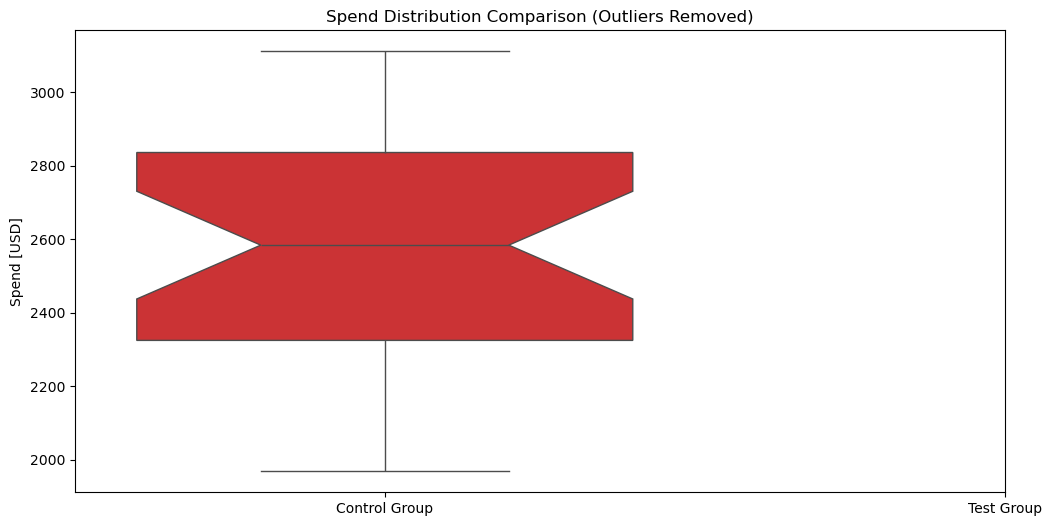

In [89]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=[control_df['Spend [USD]'], test_df['Spend [USD]']], 
            palette="Set1", notch=True)
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.title('Spend Distribution Comparison (Outliers Removed)')
plt.ylabel('Spend [USD]')
plt.show()

**Visualization of Purchases Over Time**

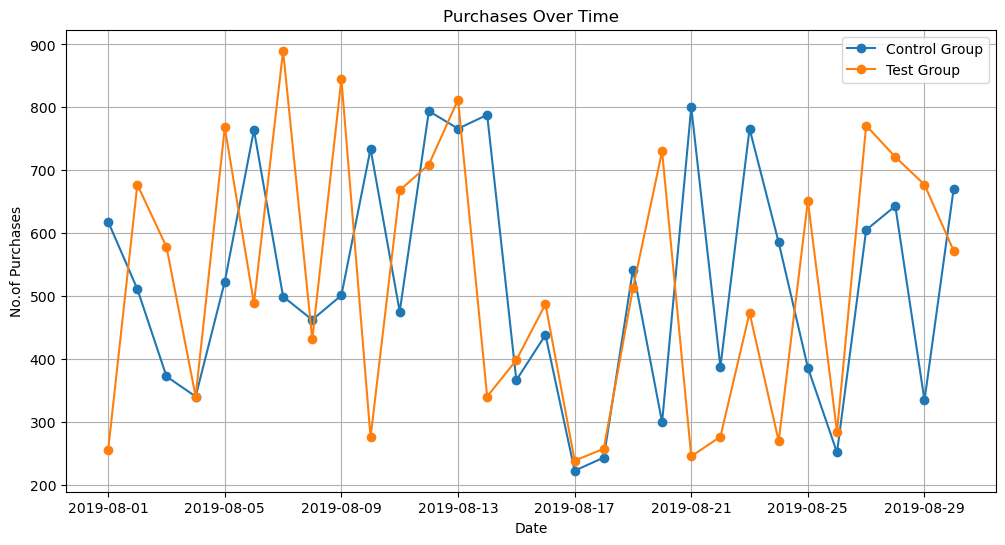

In [90]:
plt.figure(figsize=(12, 6))
plt.plot(control_df['Date'], control_df['# of Purchase'], label='Control Group', marker='o')
plt.plot(test_df['Date'], test_df['# of Purchase'], label='Test Group', marker='o')
plt.title('Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('No.of Purchases')
plt.legend()
plt.grid(True)
plt.show()


**Additional Visualization of Purchase Distribution**

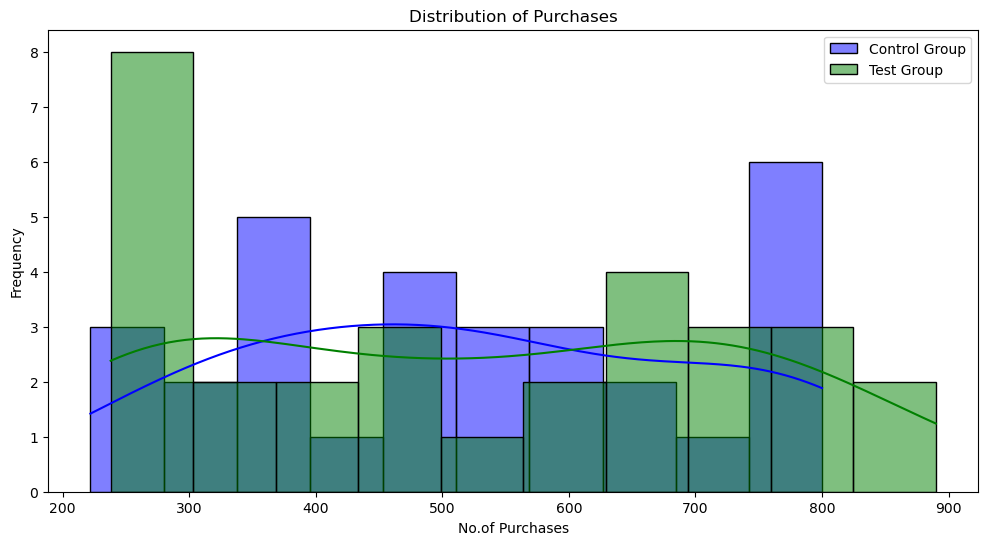

In [91]:
plt.figure(figsize=(12, 6))
sns.histplot(control_df['# of Purchase'], kde=True, label='Control Group', color='blue', bins=10)
sns.histplot(test_df['# of Purchase'], kde=True, label='Test Group', color='green', bins=10)
plt.title('Distribution of Purchases')
plt.xlabel('No.of Purchases')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Performing Mann-Whitney U test**

In [92]:
u_stat, p_value_mw = mannwhitneyu(control_df['# of Purchase'], test_df['# of Purchase'])
print(f'Mann-Whitney U statistic: {u_stat:.4f}, P-value: {p_value_mw:.4f}')

Mann-Whitney U statistic: 455.0000, P-value: 0.9470


**Performing T-Test for Completeness**

In [93]:
t_stat, p_value_ttest = stats.ttest_ind(control_df['# of Purchase'], test_df['# of Purchase'])
print(f'T-test statistic: {t_stat:.4f}, P-value: {p_value_ttest:.4f}')

T-test statistic: 0.0307, P-value: 0.9756


**Calculating Cohen's d effect size**

In [94]:
control_mean = control_df['# of Purchase'].mean()
control_std = control_df['# of Purchase'].std()
test_mean = test_df['# of Purchase'].mean()
test_std = test_df['# of Purchase'].std()

pooled_std = np.sqrt((control_std**2 + test_std**2) / 2)
cohen_d = (test_mean - control_mean) / pooled_std
print(f'Cohen\'s d effect size: {cohen_d:.4f}')

Cohen's d effect size: -0.0079


**Interpreting the Results**

In [95]:
alpha = 0.05
if p_value_ttest < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups (T-test).")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups (T-test).")

if p_value_mw < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups (Mann-Whitney U test).")
else:
    print("Fail to reject the null hypothesis: No significant difference between the two groups (Mann-Whitney U test).")

Fail to reject the null hypothesis: No significant difference between the two groups (T-test).
Fail to reject the null hypothesis: No significant difference between the two groups (Mann-Whitney U test).


**Checking for Sensitivity Analysis**

In [96]:
for alpha in [0.01, 0.05, 0.1]:
    if p_value_ttest < alpha:
        print(f"Reject the null hypothesis at α={alpha}: There is a significant difference between the two groups (T-test).")
    else:
        print(f"Fail to reject the null hypothesis at α={alpha}: No significant difference between the two groups (T-test).")

Fail to reject the null hypothesis at α=0.01: No significant difference between the two groups (T-test).
Fail to reject the null hypothesis at α=0.05: No significant difference between the two groups (T-test).
Fail to reject the null hypothesis at α=0.1: No significant difference between the two groups (T-test).


**Generating Summary Report ( SAVING as   .CSV FILE )**

In [100]:
report_data = {
    'Mann-Whitney U statistic': u_stat,
    'Mann-Whitney U p-value': p_value_mw,
    'T-test statistic': t_stat,
    'T-test p-value': p_value_ttest,
    'Cohen\'s d effect size': cohen_d
}

report_df = pd.DataFrame([report_data])
report_df.to_csv('ab_testing_report.csv', index=False)

print("Summary report generated(Saved) as 'ab_testing_report.csv'.")

Summary report generated(Saved) as 'ab_testing_report.csv'.
